In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns

In [2]:
df = pd.read_csv('FinalBC.csv')

In [3]:
df

,Date,provincename,Construction,Transportation,Agriculture,Population,Station Name,Max Temp (°C),Total Snow (cm),Total Precip (mm),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Longitude (x),Latitude (y)
0,2001-01-01,British Columbia,0.620981,2.602186,13.129213,1779,Burns Lake,1.6,1.922222,1.533333,-5.2,-1.8,19.8,0.0,-125.96,54.38
1,2001-02-01,British Columbia,0.627851,2.531523,13.977762,1779,Burns Lake,2.6,1.819048,1.533333,-0.6,1.0,17.0,0.0,-125.96,54.38
2,2001-03-01,British Columbia,0.677102,2.776051,13.312302,1779,Burns Lake,4.5,1.916667,1.533333,-8.6,-2.1,20.1,0.0,-125.96,54.38
3,2001-04-01,British Columbia,0.628552,2.469058,12.242789,1779,Burns Lake,6.9,1.703704,1.533333,-10.2,-1.7,19.7,0.0,-125.96,54.38
4,2001-05-01,British Columbia,0.678200,2.402161,13.294518,1779,Burns Lake,13.4,1.533333,0.000000,0.5,7.0,11.0,0.0,-125.96,54.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,2021-08-01,British Columbia,91.932282,51.708886,16.002734,19952,White Rock,23.1,0.760000,0.000000,17.3,20.2,0.0,2.2,-122.78,49.02
5288,2021-09-01,British Columbia,86.923459,52.107495,15.387006,19952,White Rock,20.2,0.844444,0.000000,7.7,13.9,4.1,0.0,-122.78,49.02
5289,2021-10-01,British Columbia,86.515530,51.691871,16.481233,19952,White Rock,15.8,0.950000,0.200000,7.4,11.6,6.4,0.0,-122.78,49.02
5290,2021-11-01,British Columbia,83.294873,53.927882,15.826907,19952,White Rock,12.6,1.085714,5.400000,4.2,8.4,9.6,0.0,-122.78,49.02


In [4]:
df.set_index('Date', inplace=True)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5292 entries, 2001-01-01 to 2021-12-01
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   provincename        5292 non-null   object 
 1   Construction        5292 non-null   float64
 2   Transportation      5292 non-null   float64
 3   Agriculture         5292 non-null   float64
 4   Population          5292 non-null   int64  
 5   Station Name        5292 non-null   object 
 6   Max Temp (°C)       5292 non-null   float64
 7   Total Snow (cm)     5292 non-null   float64
 8   Total Precip (mm)   5292 non-null   float64
 9   Min Temp (°C)       5292 non-null   float64
 10  Mean Temp (°C)      5292 non-null   float64
 11  Heat Deg Days (°C)  5292 non-null   float64
 12  Cool Deg Days (°C)  5292 non-null   float64
 13  Longitude (x)       5292 non-null   float64
 14  Latitude (y)        5292 non-null   float64
dtypes: float64(12), int64(1), object(2)
m

In [7]:
unique_station_names = df['Station Name'].unique()
productivity_columns = ['Construction',  'Transportation', 'Agriculture']


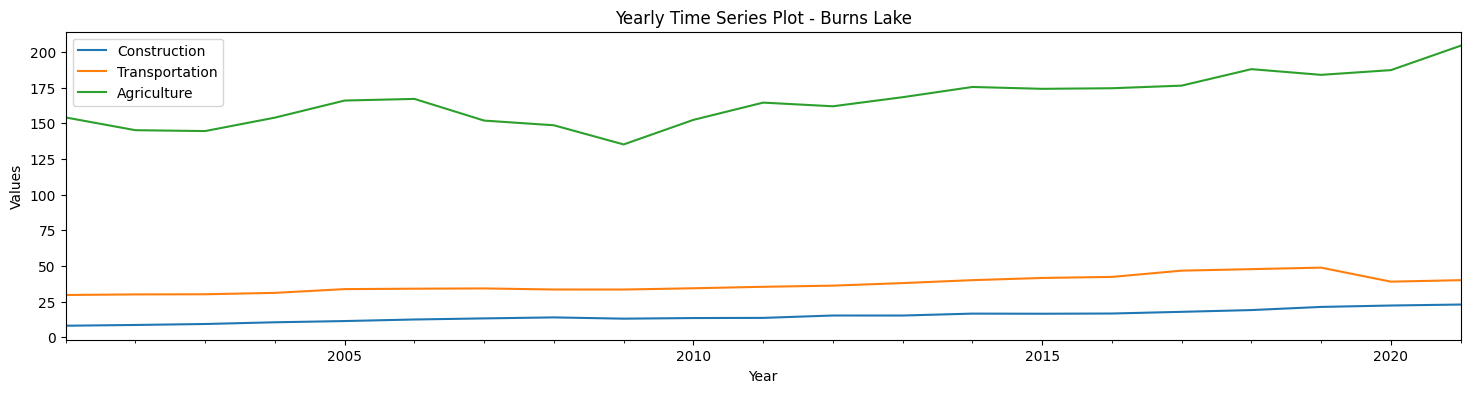

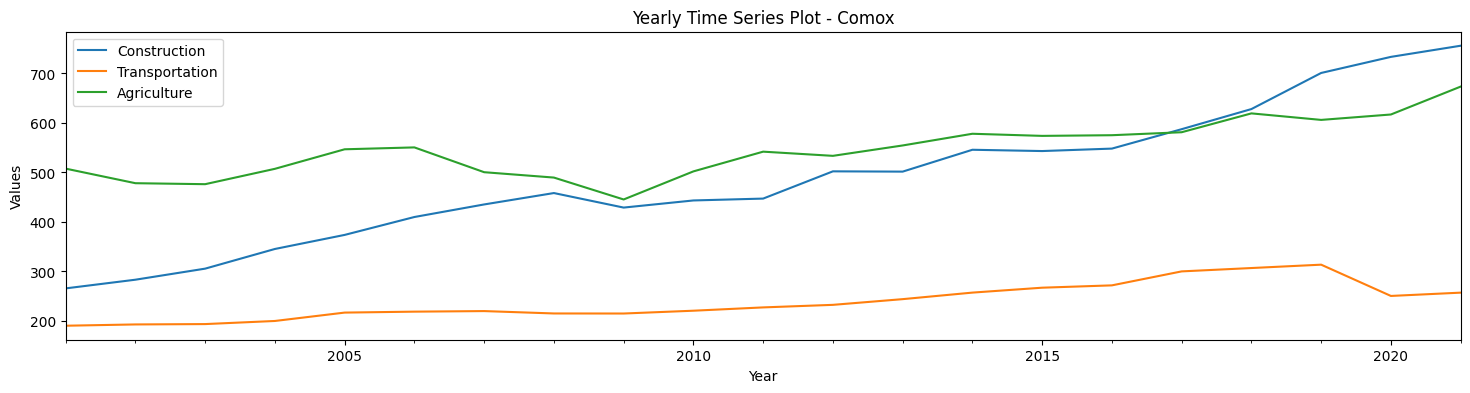

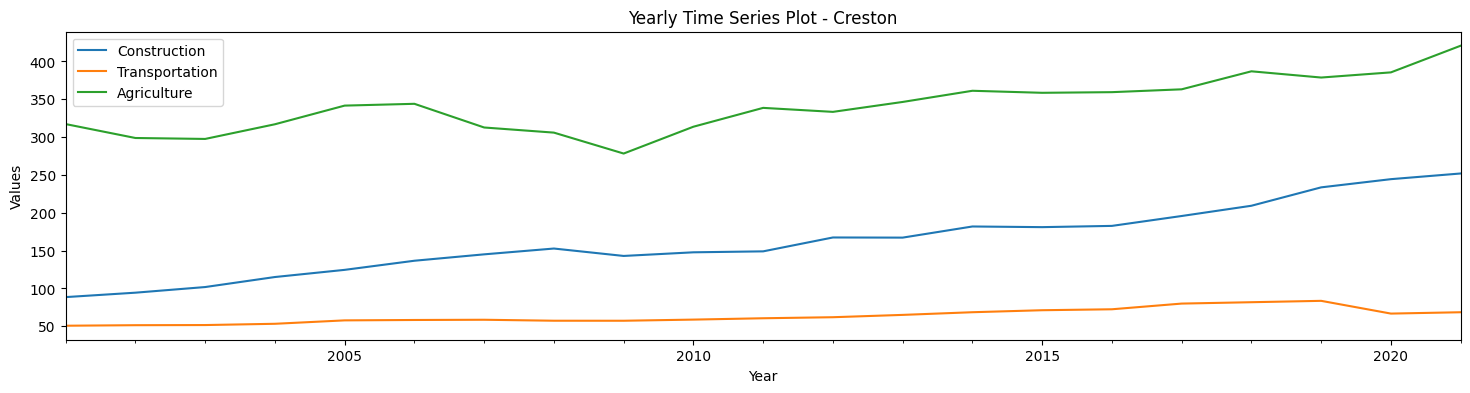

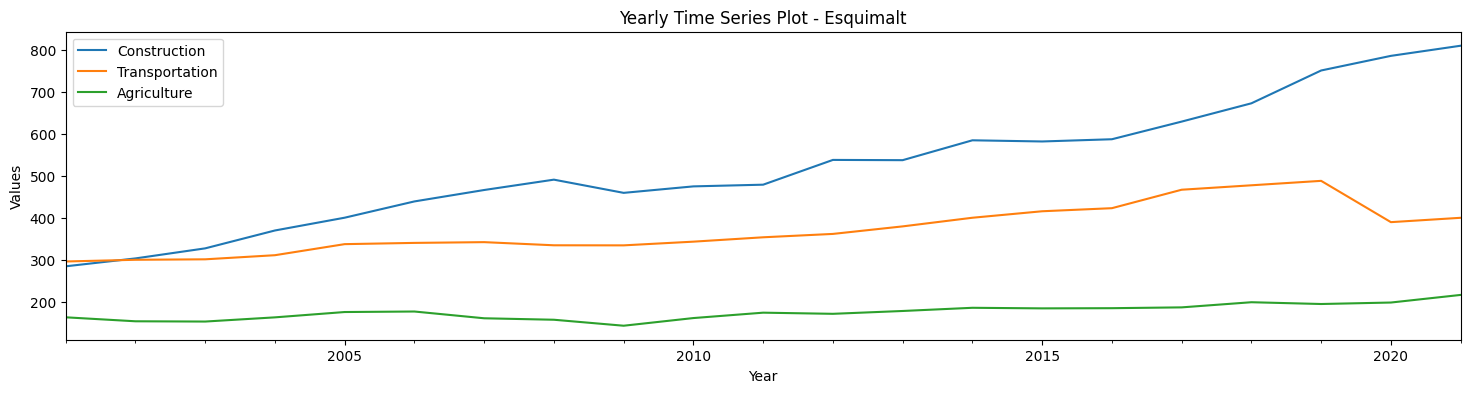

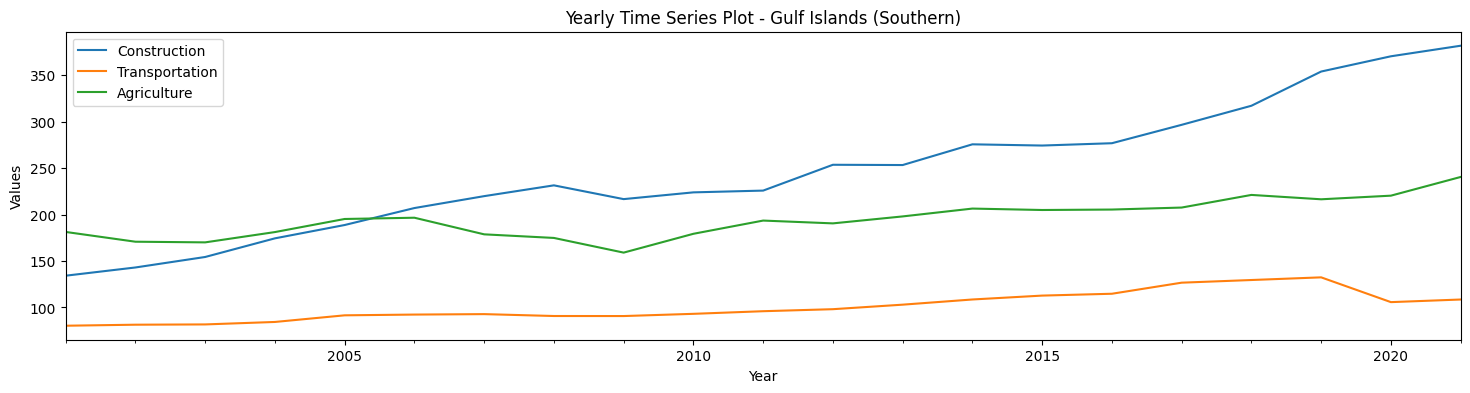

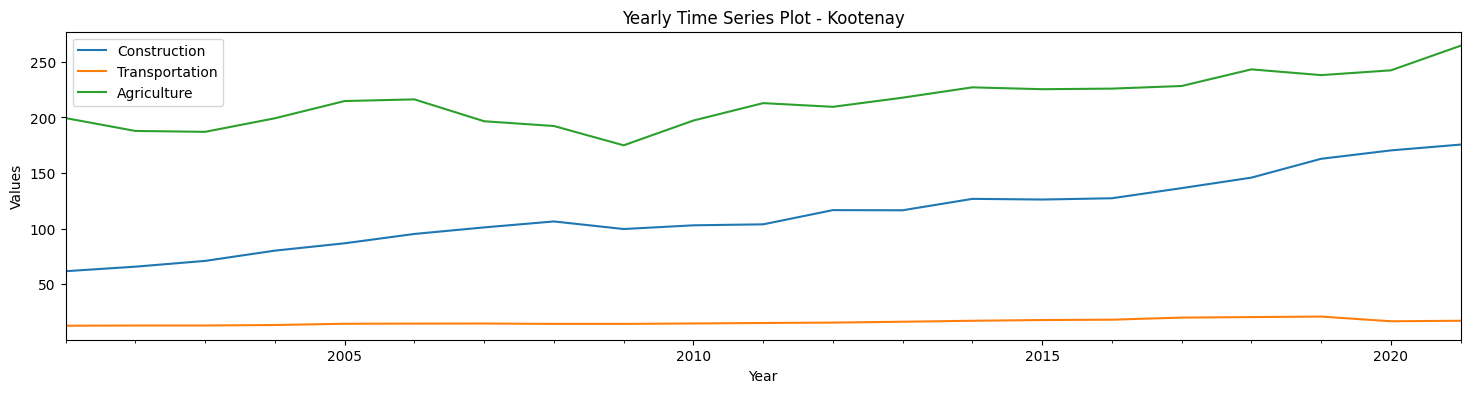

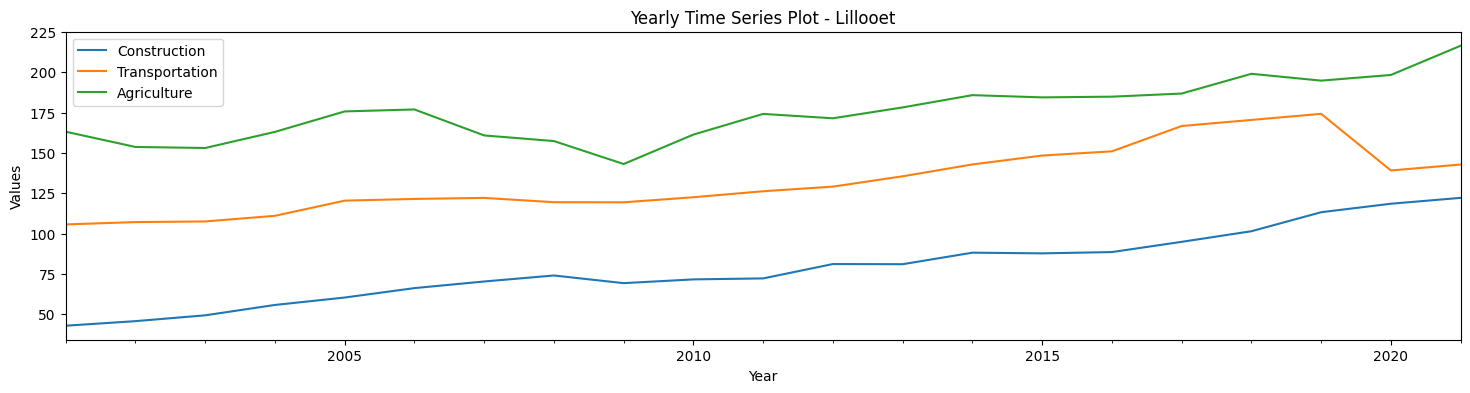

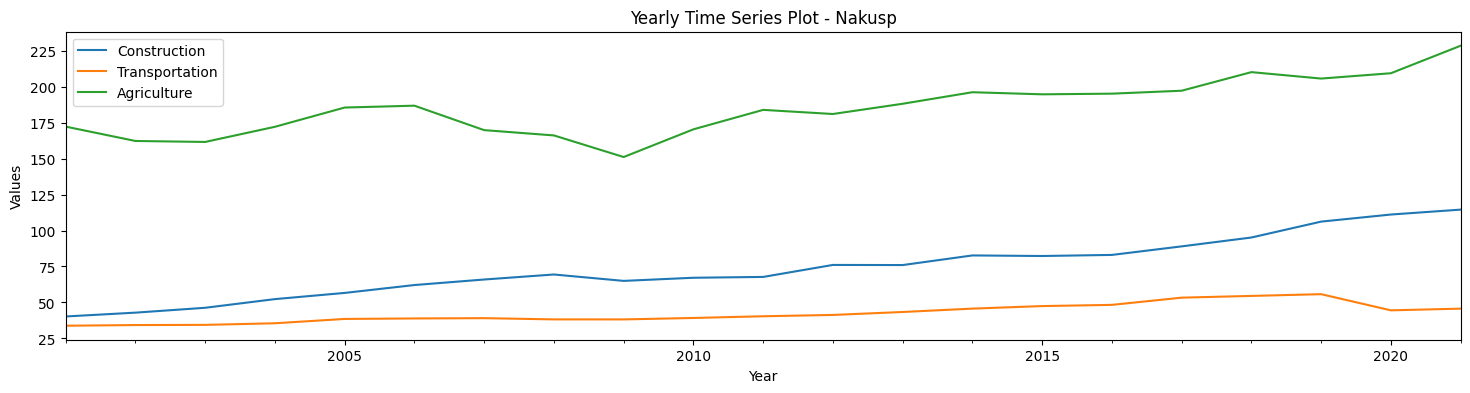

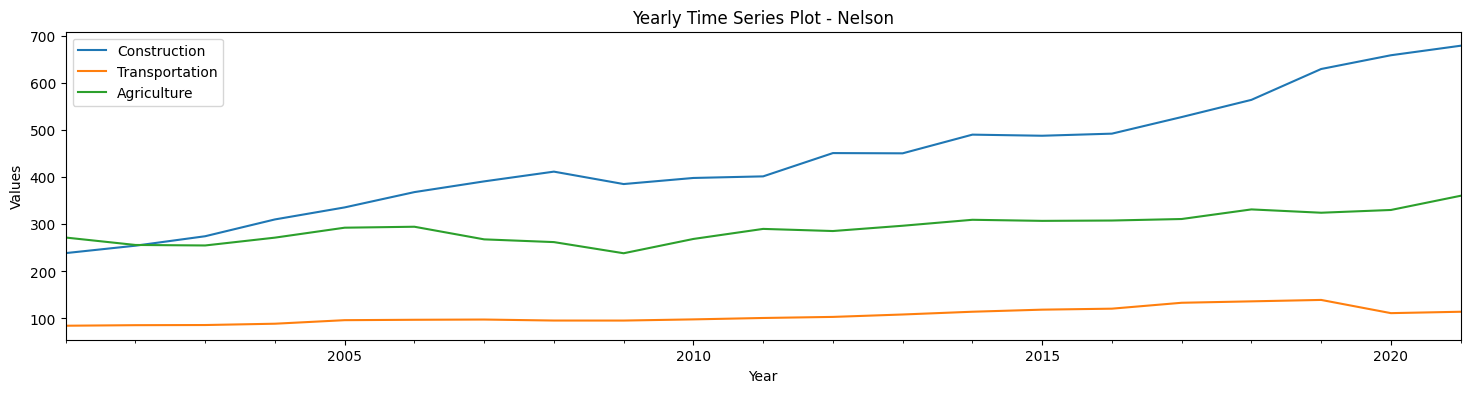

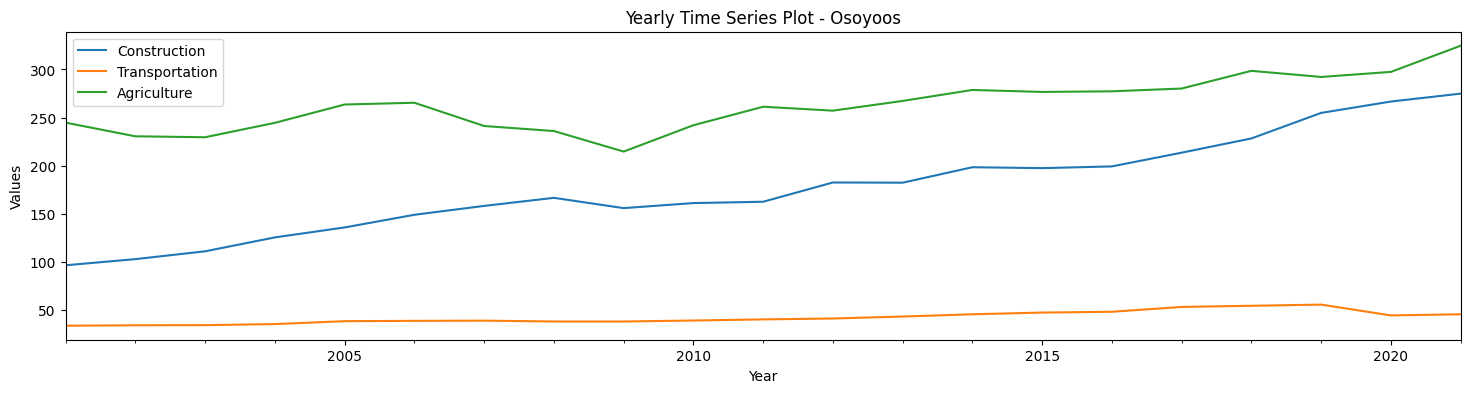

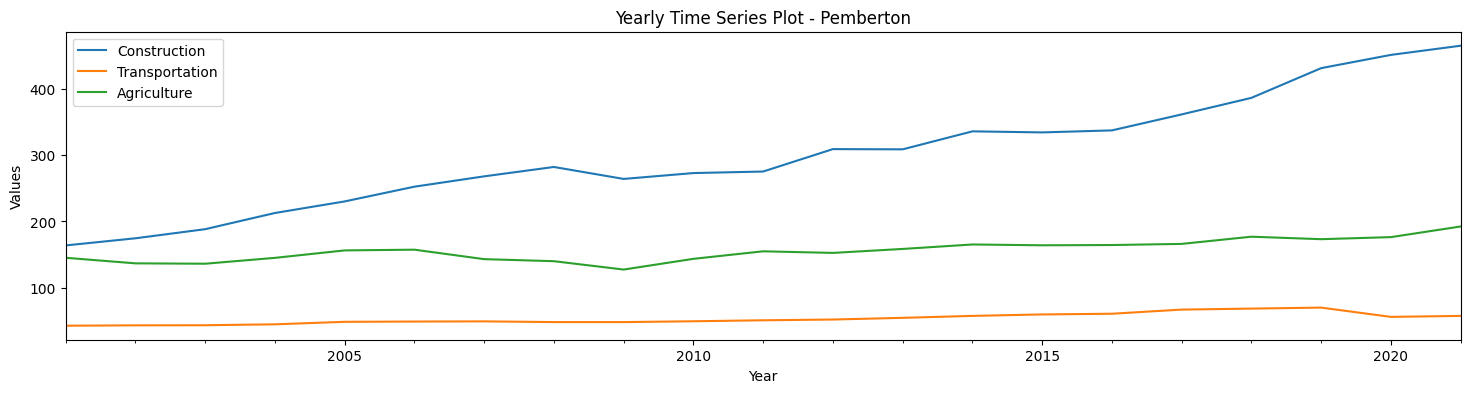

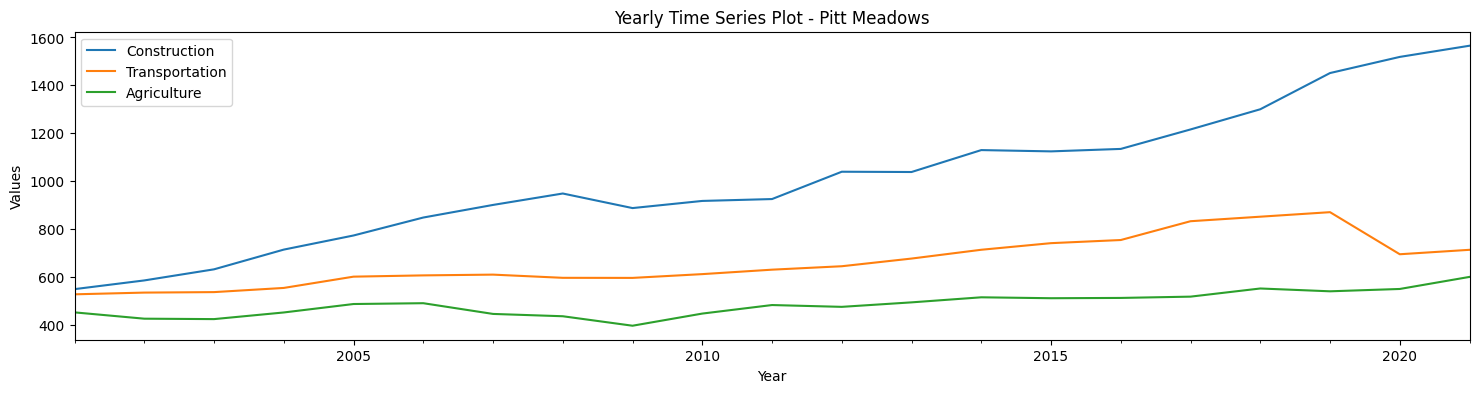

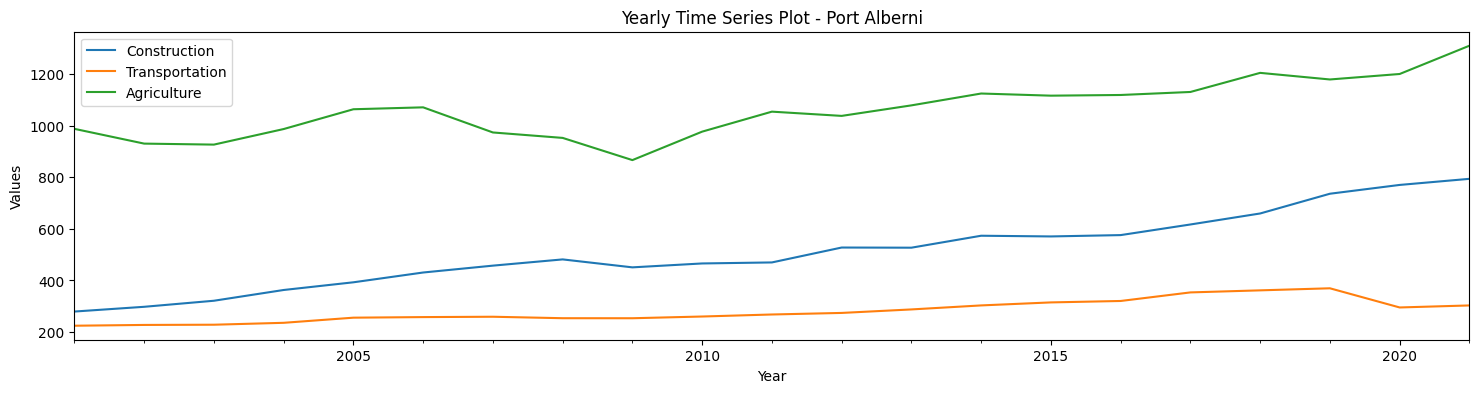

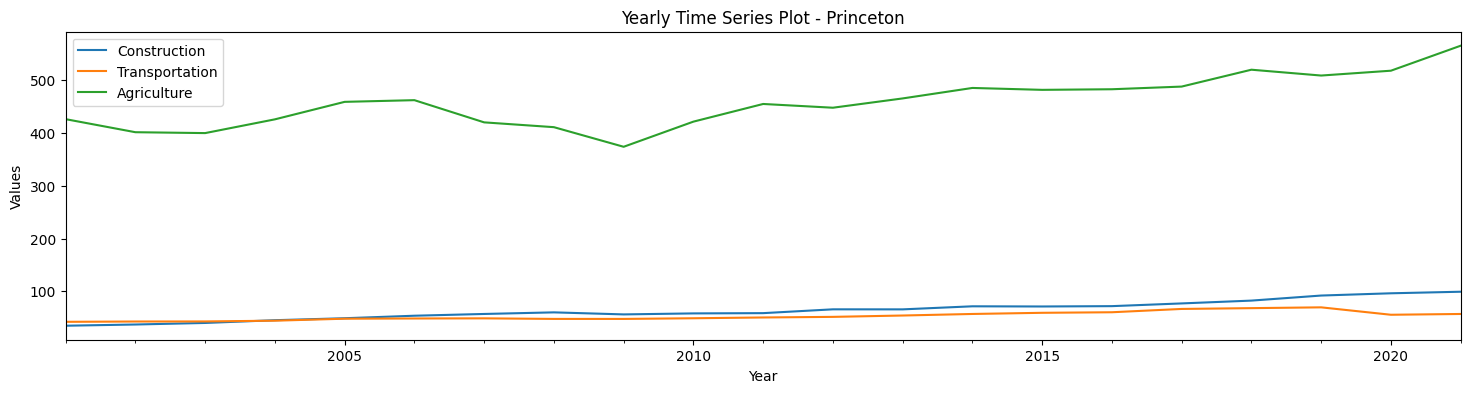

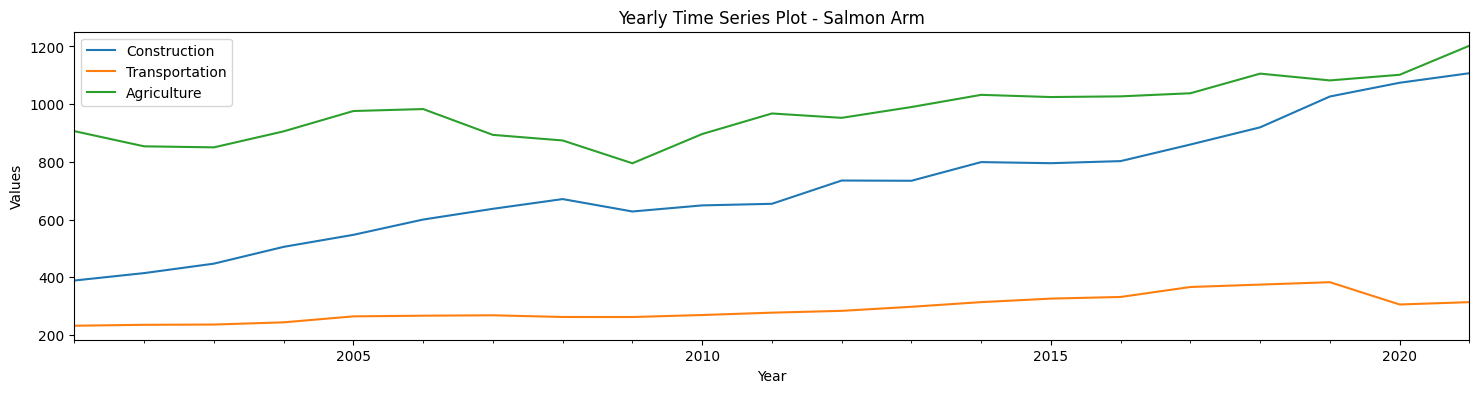

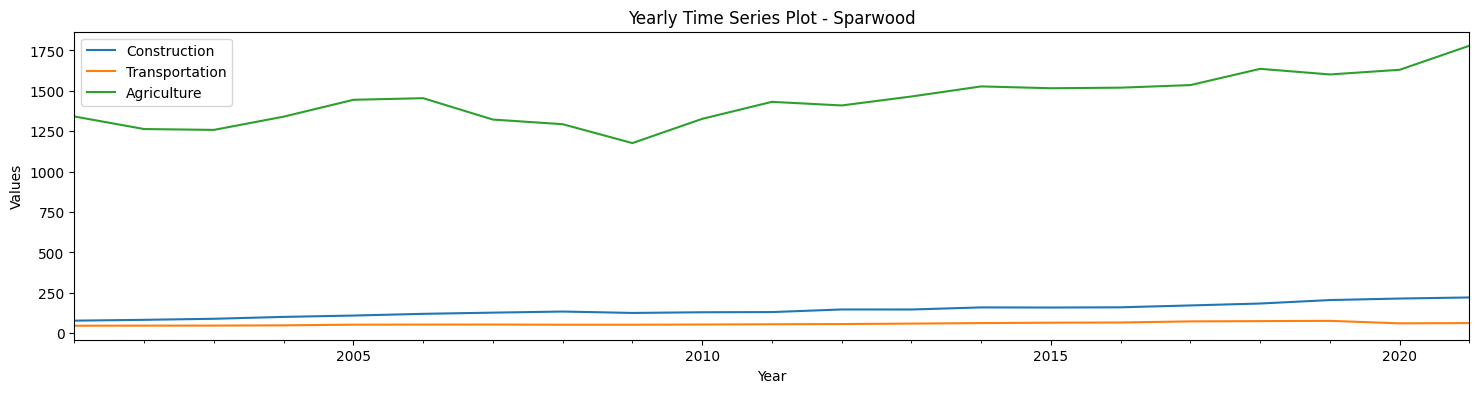

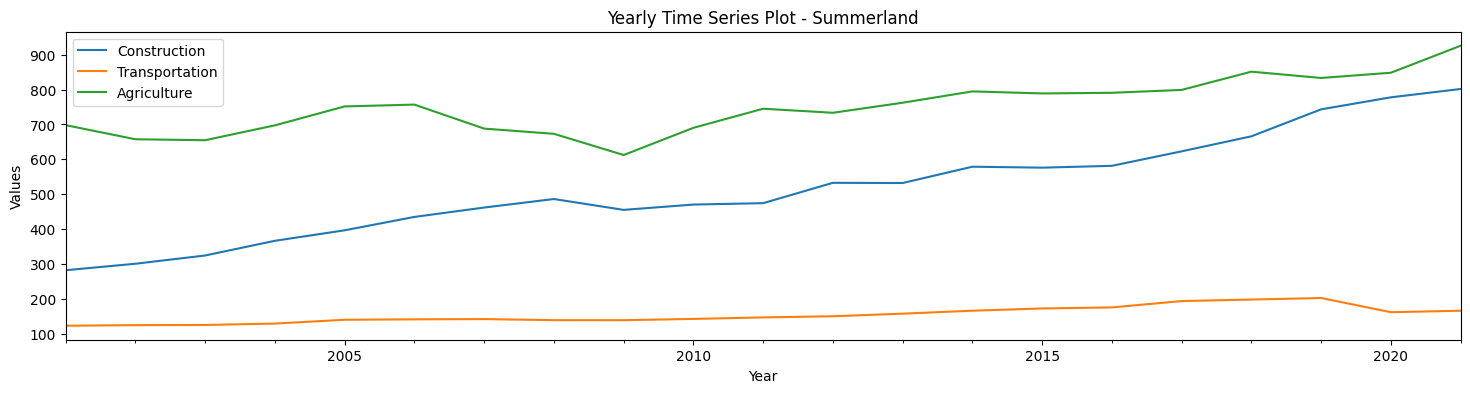

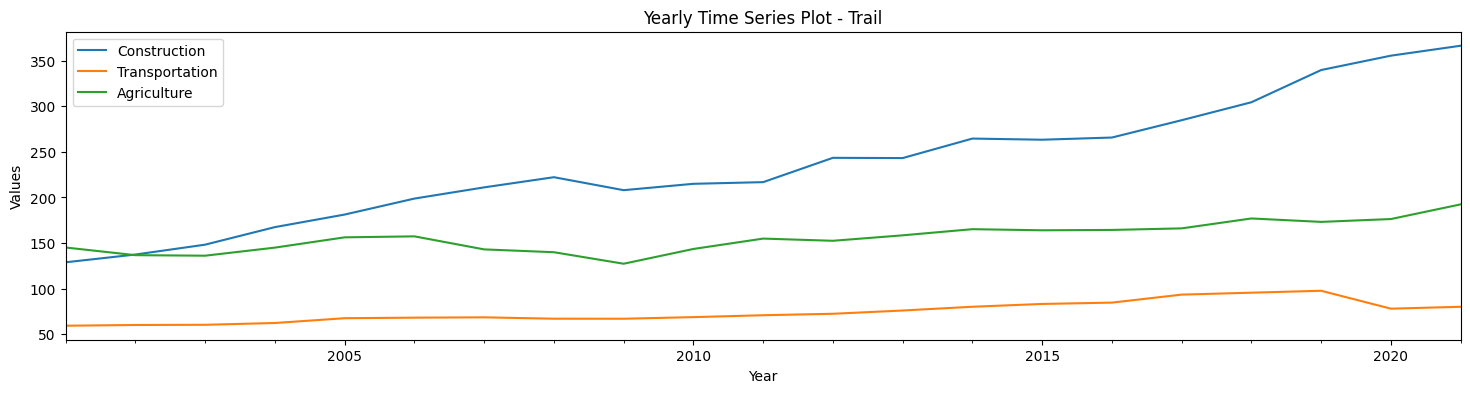

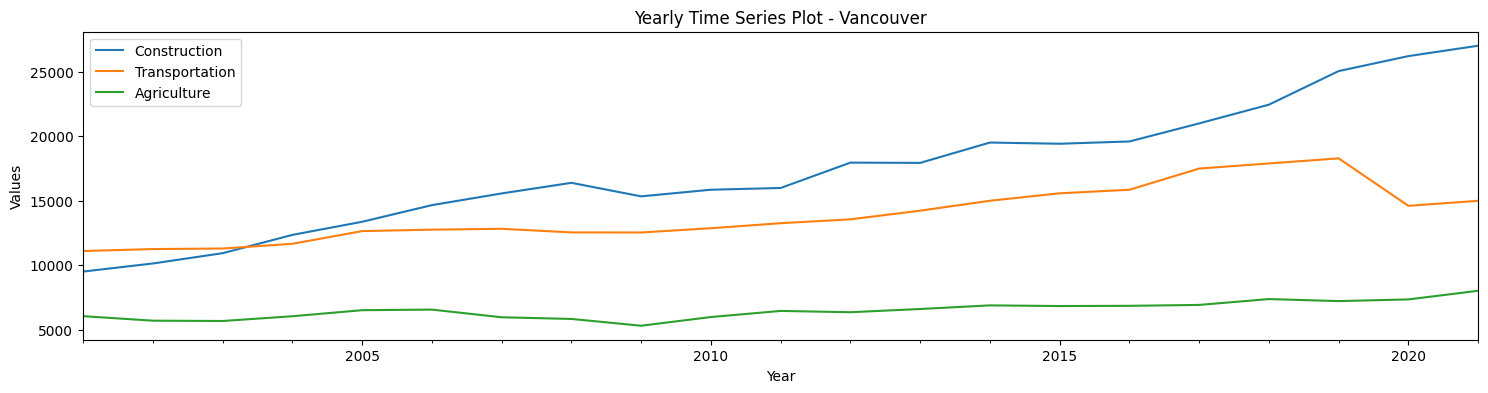

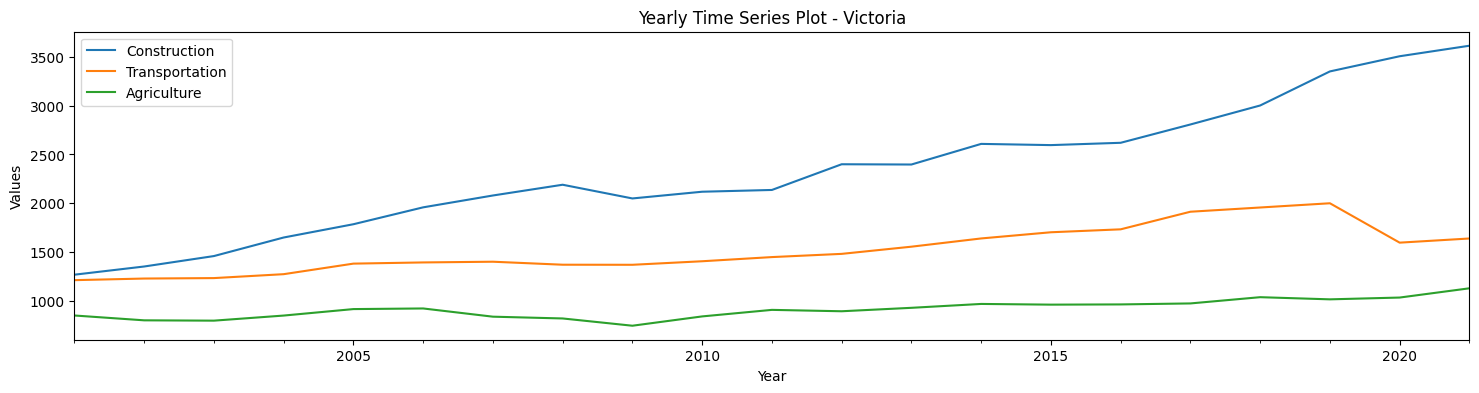

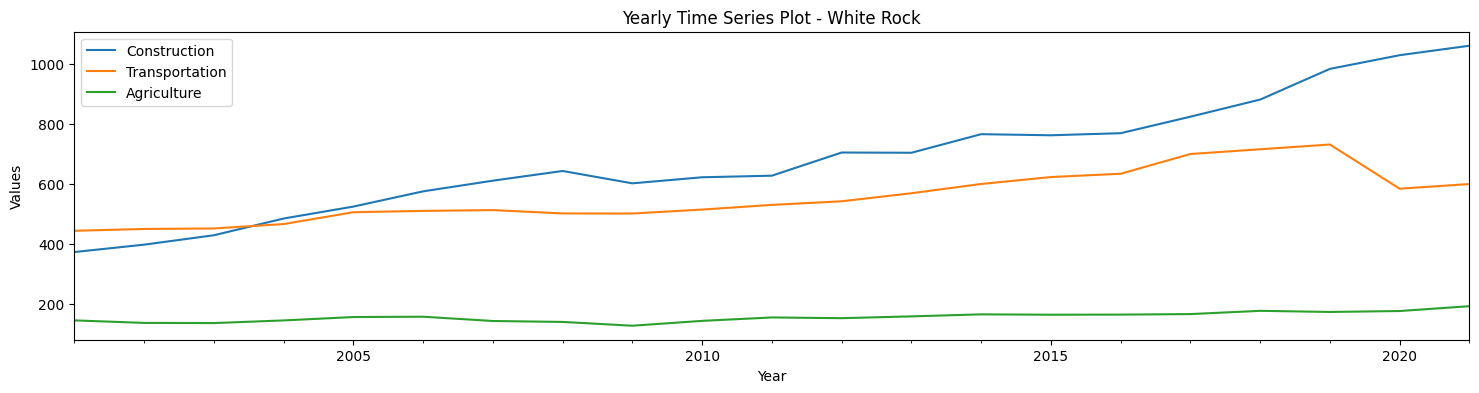

In [8]:
for station_name in unique_station_names:
    station_data = df[df['Station Name'] == station_name]
    yearly_data = station_data[productivity_columns].resample('Y').sum()
    yearly_data.plot(figsize=(18, 4), title=f'Yearly Time Series Plot - {station_name}')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.show()

# ARIMA 
## Construction Burns Lake - BC


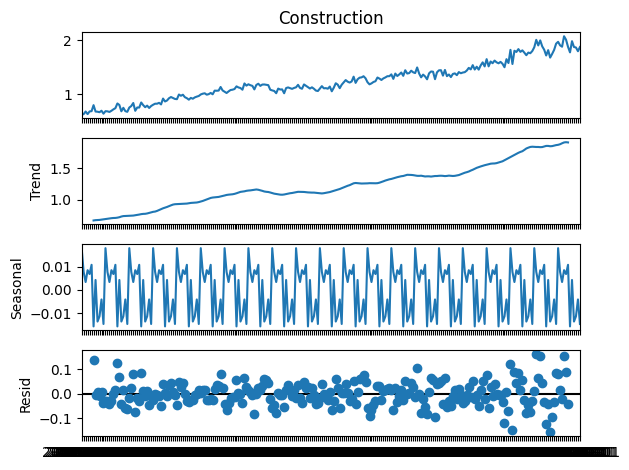

In [9]:
ConstructionBurnslake = pd.read_csv('FinalBC.csv')
Construction_Burnslake = ConstructionBurnslake[ConstructionBurnslake['Station Name'] == 'Burns Lake'][['Date', 'Construction']]
Construction_Burnslake.set_index('Date', inplace=True)
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Construction_Burnslake['Construction'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [10]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(Construction_Burnslake['Construction'])    

ADF Test Statistic : -0.06736803716042235
p-value : 0.9525933566957034
#Lags Used : 7
Number of Observations Used : 244
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
Construction_Burnslake['Construction-diff'] = Construction_Burnslake['Construction'] - Construction_Burnslake['Construction'].shift(1)

In [12]:
adfuller_test(Construction_Burnslake['Construction-diff'].dropna())

ADF Test Statistic : -8.906639881702361
p-value : 1.1331651362422361e-14
#Lags Used : 6
Number of Observations Used : 244
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

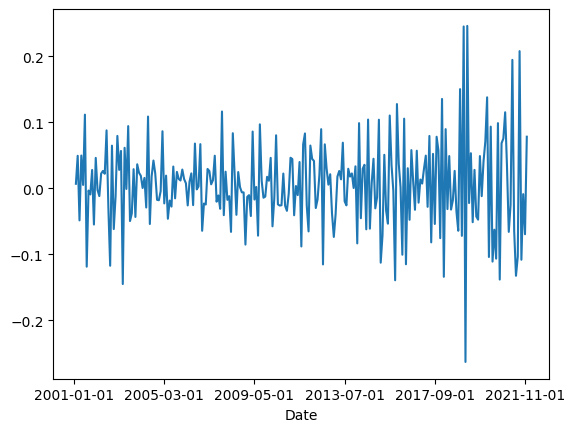

In [13]:
Construction_Burnslake['Construction-diff'].plot()

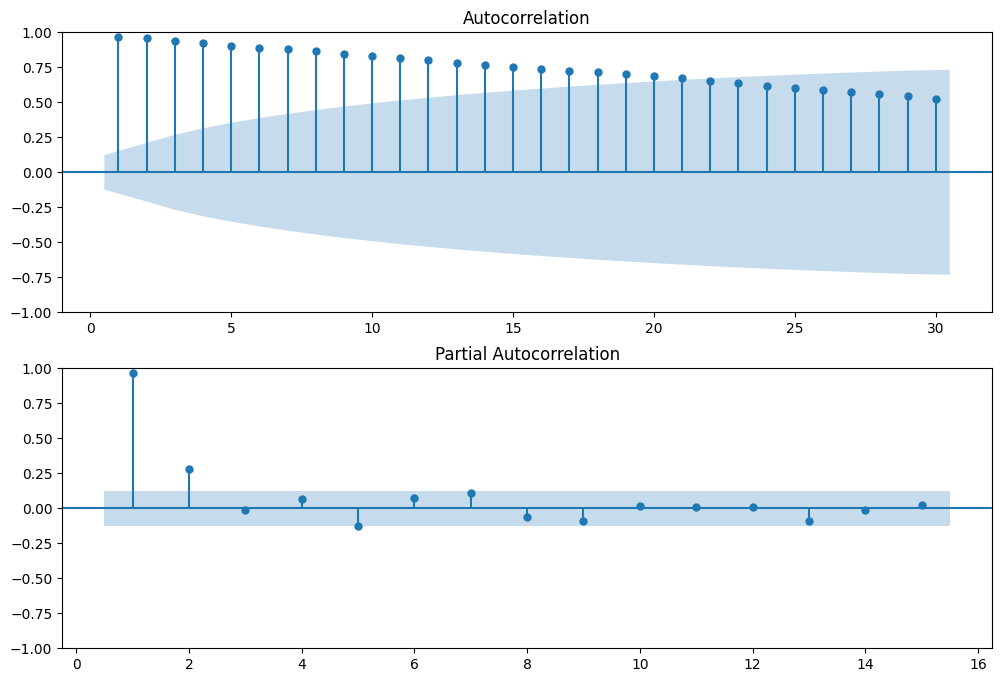

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Construction_Burnslake['Construction'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Construction_Burnslake['Construction'],zero= False,lags=15,ax=ax2)


In [15]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(6):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Construction_Burnslake['Construction'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q         AIC         BIC
11  1  5 -708.964218 -680.728785
7   1  1 -699.834010 -685.716294
10  1  4 -699.447696 -674.741692
9   1  3 -698.831120 -677.654546
8   1  2 -698.787804 -681.140659
6   1  0 -641.599961 -631.011674
5   0  5 -469.931540 -445.225536
4   0  4 -412.457154 -391.280580
3   0  3 -336.409986 -318.762841
2   0  2 -257.165055 -243.047338
1   0  1  -57.456871  -46.868584
0   0  0  188.559809  195.618667
    p  q         AIC         BIC
7   1  1 -699.834010 -685.716294
8   1  2 -698.787804 -681.140659
11  1  5 -708.964218 -680.728785
9   1  3 -698.831120 -677.654546
10  1  4 -699.447696 -674.741692
6   1  0 -641.599961 -631.011674
5   0  5 -469.931540 -445.225536
4   0  4 -412.457154 -391.280580
3   0  3 -336.409986 -318.762841
2   0  2 -257.165055 -243.047338
1   0  1  -57.456871  -46.868584
0   0  0  188.559809  195.618667


In [17]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Construction_Burnslake['Construction'], order=(1, 1, 5))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Construction   No. Observations:                  252
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 363.314
Date:                Wed, 03 Apr 2024   AIC                           -712.628
Time:                        16:51:29   BIC                           -687.950
Sample:                    01-01-2001   HQIC                          -702.697
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0321      0.303     -0.106      0.916      -0.626       0.562
ma.L1         -0.4676      0.316     -1.481      0.139      -1.087       0.151
ma.L2          0.0816      0.164      0.498      0.6

In [18]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Construction_Burnslake.index = pd.to_datetime(Construction_Burnslake.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Construction_Burnslake[Construction_Burnslake.index <= train_dataset_end]
test_data = Construction_Burnslake[(Construction_Burnslake.index > train_dataset_end) & (Construction_Burnslake.index <= test_dataset_end)]


In [19]:
model = sm.tsa.ARIMA(train_data['Construction'], order=(1, 1, 5))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


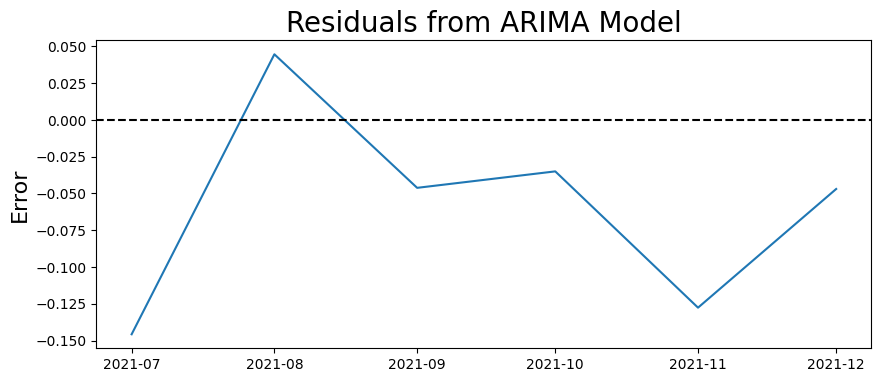

In [20]:
forecast_periods = len(test_data['Construction'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Construction'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

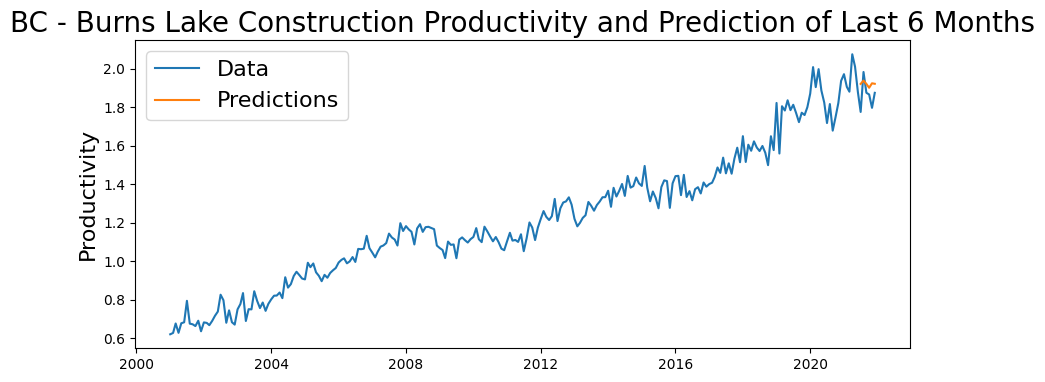

In [21]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Construction_Burnslake['Construction'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BC - Burns Lake Construction Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [22]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.08667729494113488
Mean Absolute Error: 0.07434681536868733
Mean Squared Error: 0.007512953458312485


# SARIMA 
## Construction Burns Lake - BC

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q         AIC         BIC
11  1  5 -708.964218 -680.728785
7   1  1 -699.834010 -685.716294
10  1  4 -699.447696 -674.741692
9   1  3 -698.831120 -677.654546
8   1  2 -698.787804 -681.140659
6   1  0 -641.599961 -631.011674
5   0  5 -469.931540 -445.225536
4   0  4 -412.457154 -391.280580
3   0  3 -336.409986 -318.762841
2   0  2 -257.165055 -243.047338
1   0  1  -57.456871  -46.868584
0   0  0  188.559809  195.618667
    p  q         AIC         BIC
7   1  1 -699.834010 -685.716294
8   1  2 -698.787804 -681.140659
11  1  5 -708.964218 -680.728785
9   1  3 -698.831120 -677.654546
10  1  4 -699.447696 -674.741692
6   1  0 -641.599961 -631.011674
5   0  5 -469.931540 -445.225536
4   0  4 -412.457154 -391.280580
3   0  3 -336.409986 -318.762841
2   0  2 -257.165055 -243.047338
1   0  1  -57.456871  -46.868584
0   0  0  188.559809  195.618667


In [24]:
model_SARIMA=SARIMAX(Construction_Burnslake['Construction'],order=(1,1,5),seasonal_order=(1,0,5,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Construction   No. Observations:                  252
Model:             SARIMAX(1, 1, 5)x(1, 0, 5, 12)   Log Likelihood                 376.048
Date:                            Wed, 03 Apr 2024   AIC                           -726.097
Time:                                    16:52:40   BIC                           -680.266
Sample:                                01-01-2001   HQIC                          -707.653
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0545      0.370     -0.147      0.883      -0.780       0.671
ma.L1         -0.4769      0.377     -1.265      0.206      -1.216       0.262
ma.L2          0.0327      0.212      0.154      0.877      -0.383       0.448
ma.L3         -0.1597      0.061     -2.616      0.009      -0.279      -0.040
ma.L4          0.1676      0.082      2.050      0.040       0.007       0.328
ma.L5         -0.1895      0.072     -2.629      0.009      -0.331      -0.048
ar.S.L12       0.4855      0.211      2.296      0.022       0.071       0.900
ma.S.L12      -0.2971      0.214     -1.387      0.165      -0.717       0.123
ma.S.L24       0.1199      0.079      1.516      0.129      -0.035       0.275
ma.S.L36      -0.0623      0.094     -0.664      0.507      -0.246       0.122
ma.S.L48       0.1056      0.077      1.365      0.172      -0.046       0.257
ma.S.L60       0.2338      0.082      2.857      0.004       0.073       0.394
sigma2         0.0028      0.000     10.466      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 3.44
Prob(Q):                              0.73   Prob(JB):                         0.18
Heteroskedasticity (H):               2.75   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [25]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Construction_Burnslake[:train_dataset_end]
test_data=Construction_Burnslake[train_dataset_end+timedelta(days=1):test_dataset_end]


In [26]:
#Fit SARIMA model
my_order = (1,1,5)
my_seasonal_order = (1, 0, 5, 12)
# define model
model = SARIMAX(train_data['Construction'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Construction   No. Observations:                  246
Model:             SARIMAX(1, 1, 5)x(1, 0, 5, 12)   Log Likelihood                 371.429
Date:                            Wed, 03 Apr 2024   AIC                           -716.859
Time:                                    16:53:50   BIC                           -671.343
Sample:                                01-01-2001   HQIC                          -698.530
                                     - 06-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2612      0.381     -0.686      0.493      -1.008       0.485
ma.L1         -0.2805      0.389   

Text(0, 0.5, 'Error')

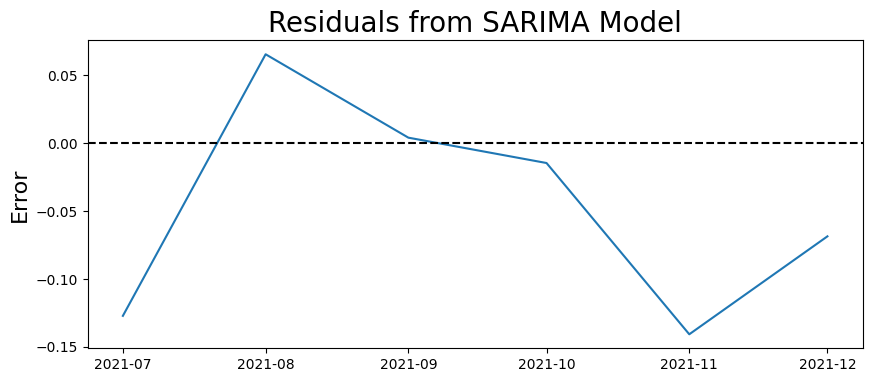

In [27]:
predictions = model_fit.forecast(steps=len(test_data['Construction']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Construction'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

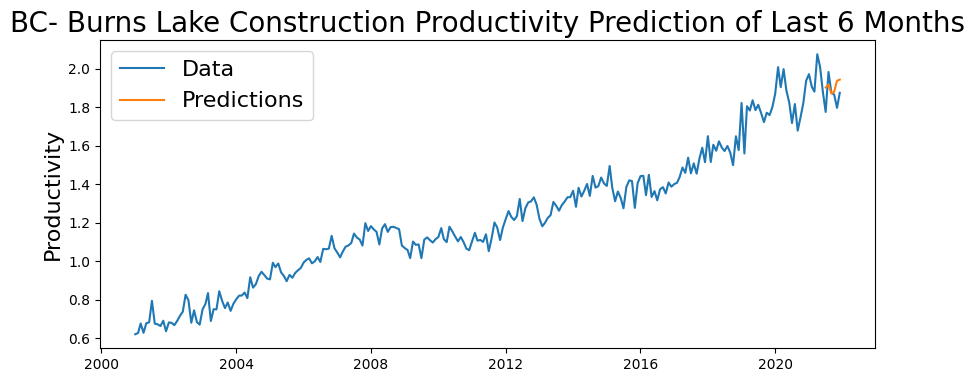

In [28]:
plt.figure(figsize=(10,4))

plt.plot(Construction_Burnslake['Construction'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BC- Burns Lake Construction Productivity Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [29]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.08680330731508376
Mean Absolute Error: 0.07011700551104727
Mean Squared Error: 0.007534814160836873


# ARIMA 
## Transportation Kootenay - BC


In [67]:
TransportationKootenay = pd.read_csv('FinalBC.csv')

In [68]:
TransportationKootenay

,Date,provincename,Construction,Transportation,Agriculture,Population,Station Name,Max Temp (°C),Total Snow (cm),Total Precip (mm),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Longitude (x),Latitude (y)
0,01-01-2001,British Columbia,0.620981,2.602186,13.129213,1779,Burns Lake,1.6,1.922222,1.533333,-5.2,-1.8,19.8,0.0,-125.96,54.38
1,01-02-2001,British Columbia,0.627851,2.531523,13.977762,1779,Burns Lake,2.6,1.819048,1.533333,-0.6,1.0,17.0,0.0,-125.96,54.38
2,01-03-2001,British Columbia,0.677102,2.776051,13.312302,1779,Burns Lake,4.5,1.916667,1.533333,-8.6,-2.1,20.1,0.0,-125.96,54.38
3,01-04-2001,British Columbia,0.628552,2.469058,12.242789,1779,Burns Lake,6.9,1.703704,1.533333,-10.2,-1.7,19.7,0.0,-125.96,54.38
4,01-05-2001,British Columbia,0.678200,2.402161,13.294518,1779,Burns Lake,13.4,1.533333,0.000000,0.5,7.0,11.0,0.0,-125.96,54.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,01-08-2021,British Columbia,91.932282,51.708886,16.002734,19952,White Rock,23.1,0.760000,0.000000,17.3,20.2,0.0,2.2,-122.78,49.02
5288,01-09-2021,British Columbia,86.923459,52.107495,15.387006,19952,White Rock,20.2,0.844444,0.000000,7.7,13.9,4.1,0.0,-122.78,49.02
5289,01-10-2021,British Columbia,86.515530,51.691871,16.481233,19952,White Rock,15.8,0.950000,0.200000,7.4,11.6,6.4,0.0,-122.78,49.02
5290,01-11-2021,British Columbia,83.294873,53.927882,15.826907,19952,White Rock,12.6,1.085714,5.400000,4.2,8.4,9.6,0.0,-122.78,49.02


In [69]:
Transportation_Kootenay = TransportationKootenay[TransportationKootenay['Station Name'] == 'Kootenay'][['Date', 'Transportation']]

In [70]:
Transportation_Kootenay.set_index('Date', inplace=True)


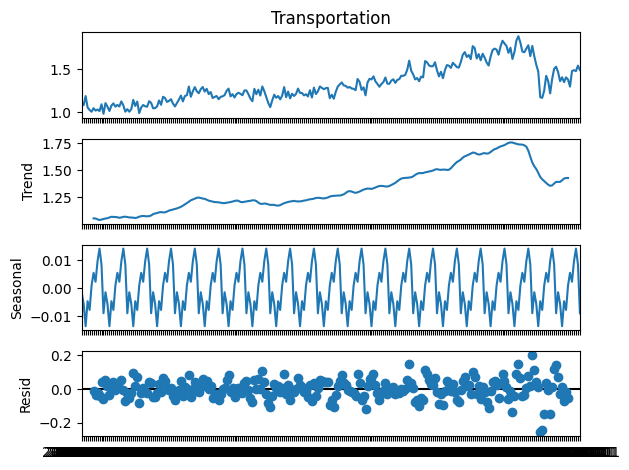

In [71]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Transportation_Kootenay['Transportation'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [72]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Transportation_Kootenay)
# Print test statistic
print(result)

(-1.4681859728736606, 0.5491865066338074, 7, 244, {'1%': -3.457437824930831, '5%': -2.873459364726563, '10%': -2.573122099570008}, -620.4684914572392)


In [73]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary

def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [74]:
adfuller_test(Transportation_Kootenay['Transportation'])

ADF Test Statistic : -1.4681859728736606
p-value : 0.5491865066338074
#Lags Used : 7
Number of Observations Used : 244
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [75]:
Transportation_Kootenay['Transportation-d'] = Transportation_Kootenay['Transportation'] - Transportation_Kootenay['Transportation'].shift(1)

In [76]:
adfuller_test(Transportation_Kootenay['Transportation-d'].dropna())

ADF Test Statistic : -8.406830623637537
p-value : 2.1562960210116894e-13
#Lags Used : 6
Number of Observations Used : 244
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

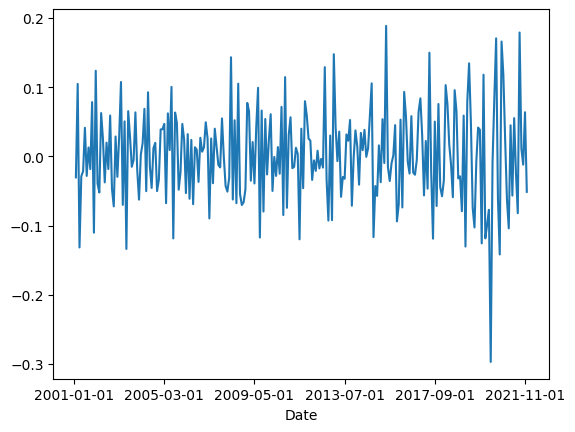

In [77]:
Transportation_Kootenay['Transportation-d'].plot()

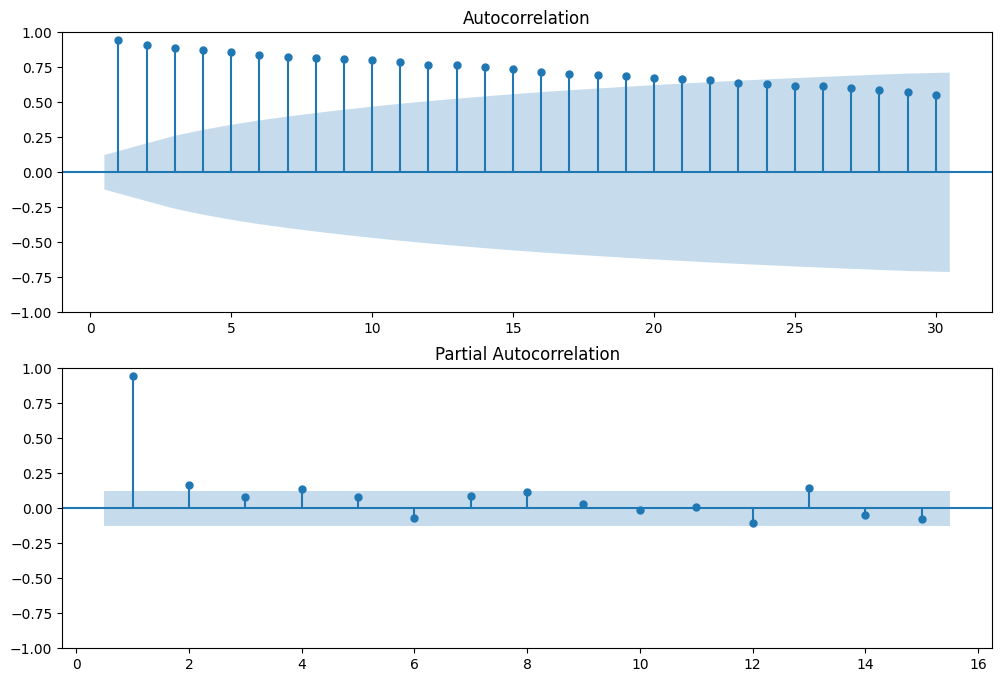

In [78]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Transportation_Kootenay['Transportation'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Transportation_Kootenay['Transportation'],zero= False,lags=15,ax=ax2)


In [79]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(5):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Transportation_Kootenay['Transportation'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

In [80]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
8  1  3 -658.955352 -637.778778
9  1  4 -656.976073 -632.270069
7  1  2 -653.086320 -635.439174
6  1  1 -652.013827 -637.896111
5  1  0 -642.466110 -631.877823
4  0  4 -516.926192 -495.749617
3  0  3 -498.081495 -480.434350
2  0  2 -427.473768 -413.356052
1  0  1 -295.538388 -284.950101
0  0  0  -64.586423  -57.527565
   p  q         AIC         BIC
6  1  1 -652.013827 -637.896111
8  1  3 -658.955352 -637.778778
7  1  2 -653.086320 -635.439174
9  1  4 -656.976073 -632.270069
5  1  0 -642.466110 -631.877823
4  0  4 -516.926192 -495.749617
3  0  3 -498.081495 -480.434350
2  0  2 -427.473768 -413.356052
1  0  1 -295.538388 -284.950101
0  0  0  -64.586423  -57.527565


In [81]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Transportation_Kootenay['Transportation'], order=(1, 1, 3))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Transportation   No. Observations:                  252
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 334.647
Date:                Wed, 03 Apr 2024   AIC                           -659.294
Time:                        17:00:09   BIC                           -641.667
Sample:                    01-01-2001   HQIC                          -652.200
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0362      0.246      0.147      0.883      -0.445       0.517
ma.L1         -0.3122      0.238     -1.310      0.190      -0.779       0.155
ma.L2         -0.0384      0.088     -0.434      0.6

# Use testing data as of last six months

In [82]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Transportation_Kootenay.index = pd.to_datetime(Transportation_Kootenay.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Transportation_Kootenay[Transportation_Kootenay.index <= train_dataset_end]
test_data = Transportation_Kootenay[(Transportation_Kootenay.index > train_dataset_end) & (Transportation_Kootenay.index <= test_dataset_end)]


In [83]:
test_data

,Transportation,Transportation-d
Date,,
2021-07-01,1.298291,-0.082046
2021-08-01,1.477397,0.179106
2021-09-01,1.488786,0.011389
2021-10-01,1.476911,-0.011875
2021-11-01,1.540797,0.063886
2021-12-01,1.489599,-0.051197


In [84]:
model = sm.tsa.ARIMA(train_data['Transportation'], order=(1, 1, 3))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [85]:
forecast_periods = len(test_data['Transportation'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions



Date
2021-07-01    1.397310
2021-08-01    1.391496
2021-09-01    1.394875
2021-10-01    1.394792
2021-11-01    1.394794
2021-12-01    1.394794
Name: predicted_mean, dtype: float64

In [86]:
residuals = test_data['Transportation'] - predictions
residuals

Date
2021-07-01   -0.099019
2021-08-01    0.085901
2021-09-01    0.093910
2021-10-01    0.082118
2021-11-01    0.146002
2021-12-01    0.094805
dtype: float64

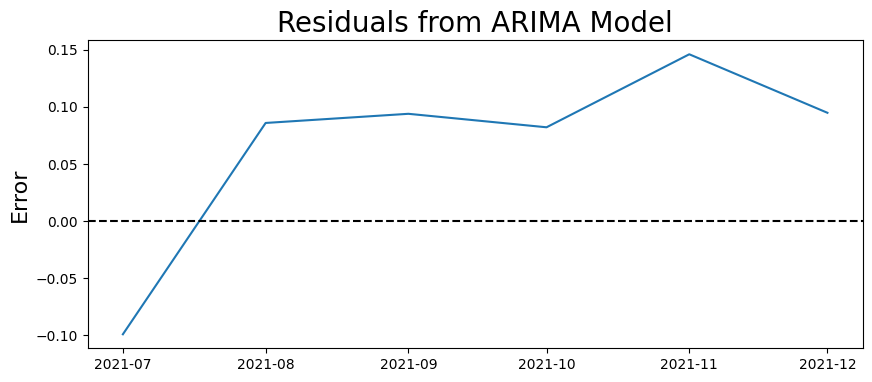

In [87]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

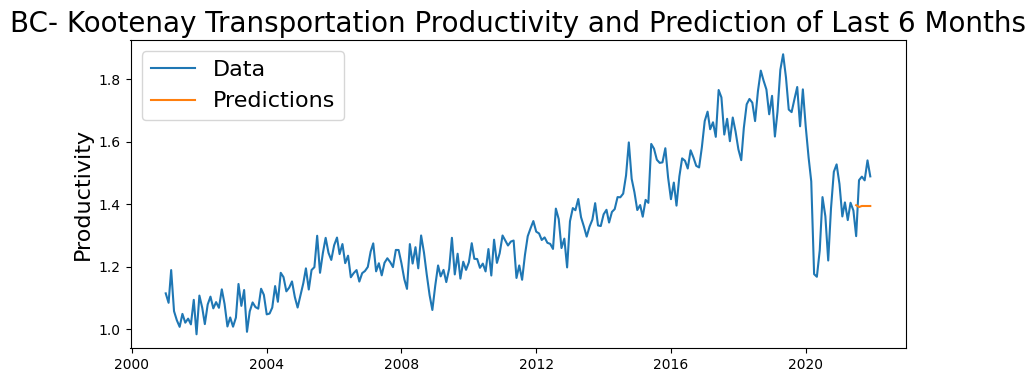

In [88]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Transportation_Kootenay['Transportation'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BC- Kootenay Transportation Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [89]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.10251092300785798
Mean Absolute Error: 0.10029263354913143
Mean Squared Error: 0.010508489335922987


# SARIMA

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
8  1  3 -658.955352 -637.778778
9  1  4 -656.976073 -632.270069
7  1  2 -653.086320 -635.439174
6  1  1 -652.013827 -637.896111
5  1  0 -642.466110 -631.877823
4  0  4 -516.926192 -495.749617
3  0  3 -498.081495 -480.434350
2  0  2 -427.473768 -413.356052
1  0  1 -295.538388 -284.950101
0  0  0  -64.586423  -57.527565
   p  q         AIC         BIC
6  1  1 -652.013827 -637.896111
8  1  3 -658.955352 -637.778778
7  1  2 -653.086320 -635.439174
9  1  4 -656.976073 -632.270069
5  1  0 -642.466110 -631.877823
4  0  4 -516.926192 -495.749617
3  0  3 -498.081495 -480.434350
2  0  2 -427.473768 -413.356052
1  0  1 -295.538388 -284.950101
0  0  0  -64.586423  -57.527565


In [91]:
model_SARIMA=SARIMAX(Transportation_Kootenay['Transportation'],order=(0,1,0),seasonal_order=(1,0,3,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                             Transportation   No. Observations:                  252
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                 326.231
Date:                                    Wed, 03 Apr 2024   AIC                           -642.462
Time:                                            17:00:41   BIC                           -624.834
Sample:                                        01-01-2001   HQIC                          -635.368
                                             - 12-01-2021                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8140      0.318     -2.563      0.010      -1.436      -0.192
ma.S.L12       0.6240      0.318      1.962      0.050       0.001       1.247
ma.S.L24      -0.1489      0.097     -1.540      0.124      -0.338       0.041
ma.S.L36      -0.0646      0.082     -0.788      0.430      -0.225       0.096
sigma2         0.0043      0.000     11.795      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   9.70   Jarque-Bera (JB):                 6.98
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               2.69   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [92]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Transportation_Kootenay[:train_dataset_end]
test_data=Transportation_Kootenay[train_dataset_end+timedelta(days=1):test_dataset_end]


In [93]:
#Fit SARIMA model
my_order = (0,1,0)
my_seasonal_order = (1, 0, 3, 12)
# define model
model = SARIMAX(train_data['Transportation'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                         SARIMAX Results                                          
Dep. Variable:                             Transportation   No. Observations:                  246
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                 320.717
Date:                                    Wed, 03 Apr 2024   AIC                           -631.435
Time:                                            17:00:43   BIC                           -613.928
Sample:                                        01-01-2001   HQIC                          -624.385
                                             - 06-01-2021                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8400      0.210     -4.001      0

Text(0, 0.5, 'Error')

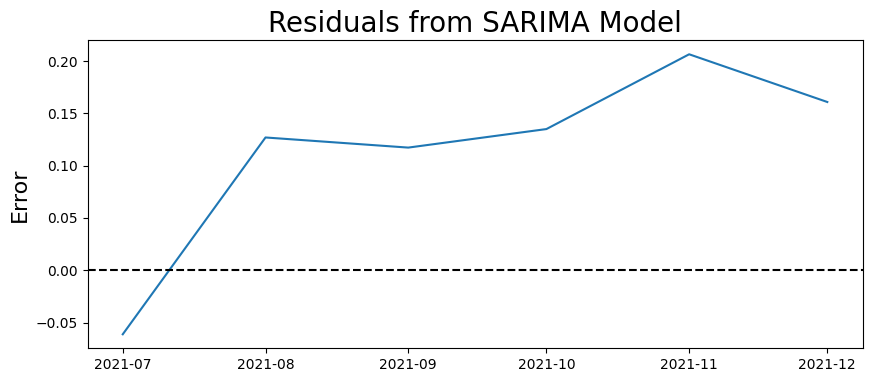

In [94]:
predictions = model_fit.forecast(steps=len(test_data['Transportation']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Transportation'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

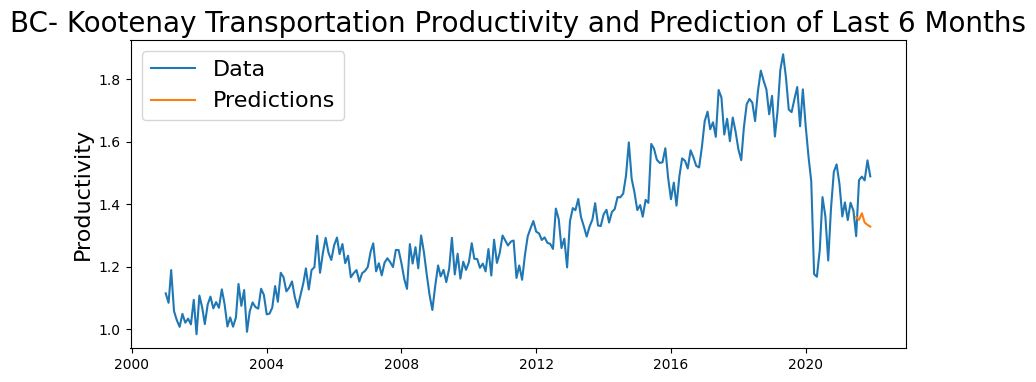

In [95]:
plt.figure(figsize=(10,4))

plt.plot(Transportation_Kootenay['Transportation'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BC- Kootenay Transportation Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [96]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.1415746535963011
Mean Absolute Error: 0.1345765203314704
Mean Squared Error: 0.020043382540912646


# ARIMA 
## Agriculture Pemberton - BC

In [14]:
Agriculture = pd.read_csv('FinalBC.csv')

In [15]:
Agriculture_Pemberton = Agriculture[Agriculture['Station Name'] == 'Pemberton'][['Date', 'Agriculture']]

In [16]:
Agriculture_Pemberton.set_index('Date', inplace=True)


In [17]:
Agriculture_Pemberton

,Agriculture
Date,
2001-01-01,12.356906
2001-02-01,13.155541
2001-03-01,12.529225
2001-04-01,11.522625
2001-05-01,12.512487
...,...
2021-08-01,16.002734
2021-09-01,15.387006
2021-10-01,16.481233


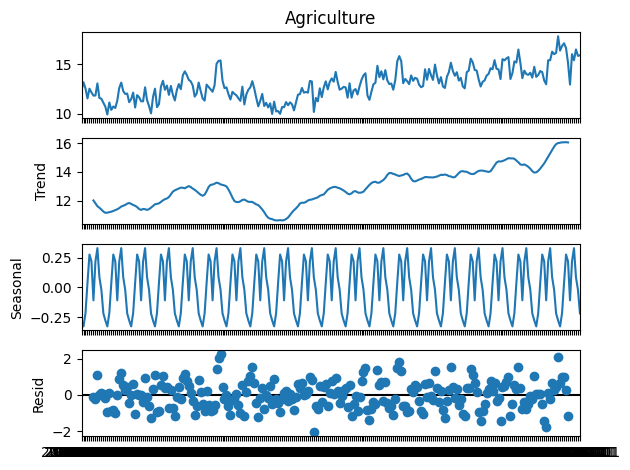

In [18]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Agriculture_Pemberton['Agriculture'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Agriculture_Pemberton)
# Print test statistic
print(result)

(-1.5212373732986268, 0.5229805814759486, 7, 244, {'1%': -3.457437824930831, '5%': -2.873459364726563, '10%': -2.573122099570008}, 605.424062311903)


In [20]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary

def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [21]:
adfuller_test(Agriculture_Pemberton['Agriculture'])

ADF Test Statistic : -1.5212373732986268
p-value : 0.5229805814759486
#Lags Used : 7
Number of Observations Used : 244
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
Agriculture_Pemberton['Agriculture-diff'] = Agriculture_Pemberton['Agriculture'] - Agriculture_Pemberton['Agriculture'].shift(1)

In [23]:
adfuller_test(Agriculture_Pemberton['Agriculture-diff'].dropna())

ADF Test Statistic : -6.581740885924803
p-value : 7.484510270448451e-09
#Lags Used : 15
Number of Observations Used : 235
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

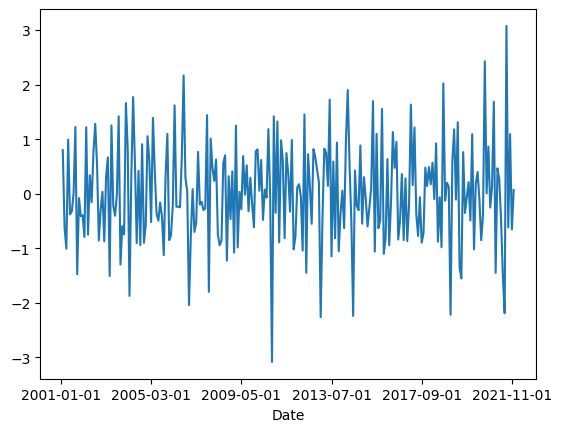

In [24]:
Agriculture_Pemberton['Agriculture-diff'].plot()

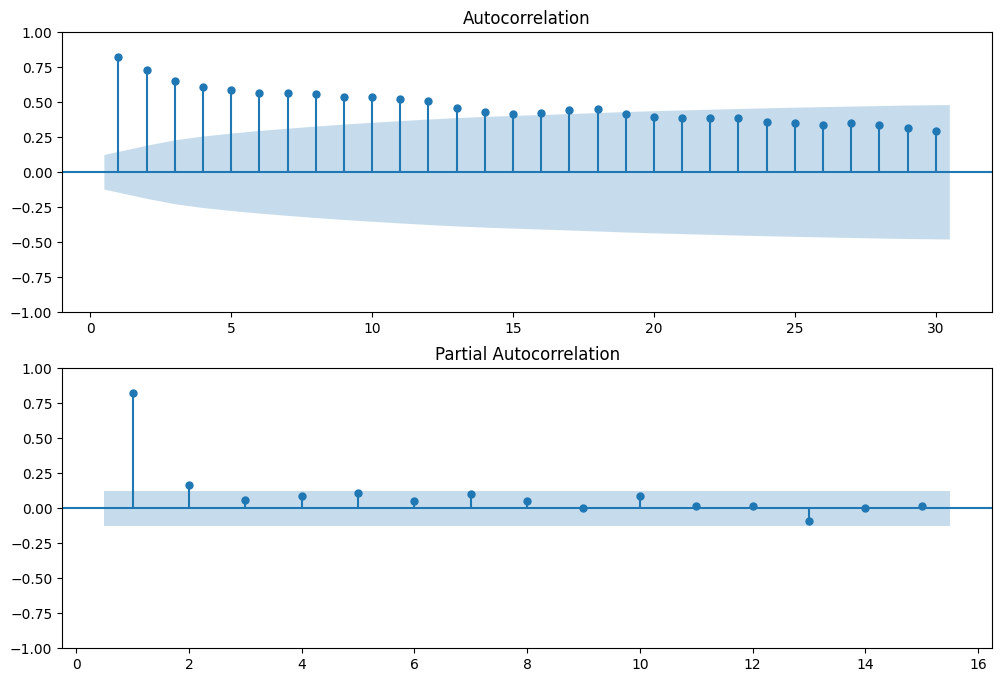

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Agriculture_Pemberton['Agriculture'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Agriculture_Pemberton['Agriculture'],zero= False,lags=15,ax=ax2)


In [26]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(4):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Agriculture_Pemberton['Agriculture'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

In [27]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
7  1  3  643.166997  664.343571
6  1  2  648.223773  665.870918
5  1  1  650.417415  664.535132
4  1  0  658.271448  668.859735
3  0  3  707.283164  724.930310
2  0  2  734.540271  748.657988
1  0  1  797.423451  808.011738
0  0  0  946.230935  953.289793
   p  q         AIC         BIC
7  1  3  643.166997  664.343571
5  1  1  650.417415  664.535132
6  1  2  648.223773  665.870918
4  1  0  658.271448  668.859735
3  0  3  707.283164  724.930310
2  0  2  734.540271  748.657988
1  0  1  797.423451  808.011738
0  0  0  946.230935  953.289793


In [28]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Agriculture_Pemberton['Agriculture'], order=(1, 1, 3))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Agriculture   No. Observations:                  252
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -313.051
Date:                Mon, 08 Apr 2024   AIC                            636.101
Time:                        00:53:00   BIC                            653.729
Sample:                    01-01-2001   HQIC                           643.195
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4432      0.274      1.618      0.106      -0.094       0.980
ma.L1         -0.8274      0.285     -2.906      0.004      -1.385      -0.269
ma.L2          0.0259      0.146      0.178      0.8

# Use testing data as of last six months

In [29]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Agriculture_Pemberton.index = pd.to_datetime(Agriculture_Pemberton.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Agriculture_Pemberton[Agriculture_Pemberton.index <= train_dataset_end]
test_data = Agriculture_Pemberton[(Agriculture_Pemberton.index > train_dataset_end) & (Agriculture_Pemberton.index <= test_dataset_end)]


In [30]:
test_data

,Agriculture,Agriculture-diff
Date,,
2021-07-01,12.927372,-2.188466
2021-08-01,16.002734,3.075362
2021-09-01,15.387006,-0.615728
2021-10-01,16.481233,1.094227
2021-11-01,15.826907,-0.654326
2021-12-01,15.894622,0.067715


In [31]:
model = sm.tsa.ARIMA(train_data['Agriculture'], order=(1, 1, 1))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
forecast_periods = len(test_data['Agriculture'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions



Date
2021-07-01    15.294902
2021-08-01    15.394456
2021-09-01    15.449804
2021-10-01    15.480576
2021-11-01    15.497684
2021-12-01    15.507196
Name: predicted_mean, dtype: float64

In [33]:
residuals = test_data['Agriculture'] - predictions
residuals

Date
2021-07-01   -2.367530
2021-08-01    0.608278
2021-09-01   -0.062798
2021-10-01    1.000657
2021-11-01    0.329223
2021-12-01    0.387427
dtype: float64

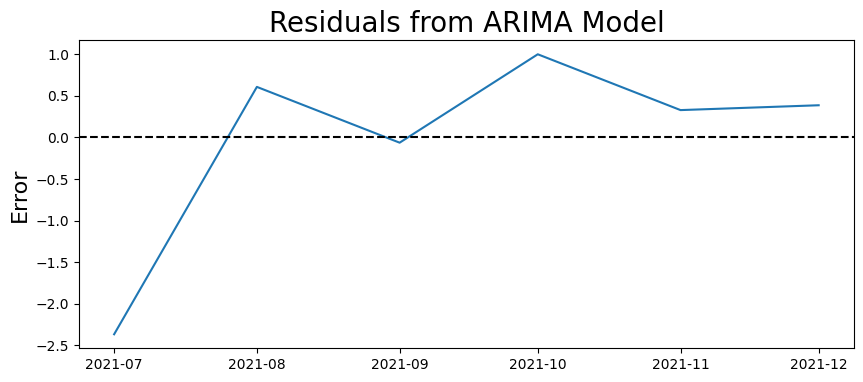

In [34]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

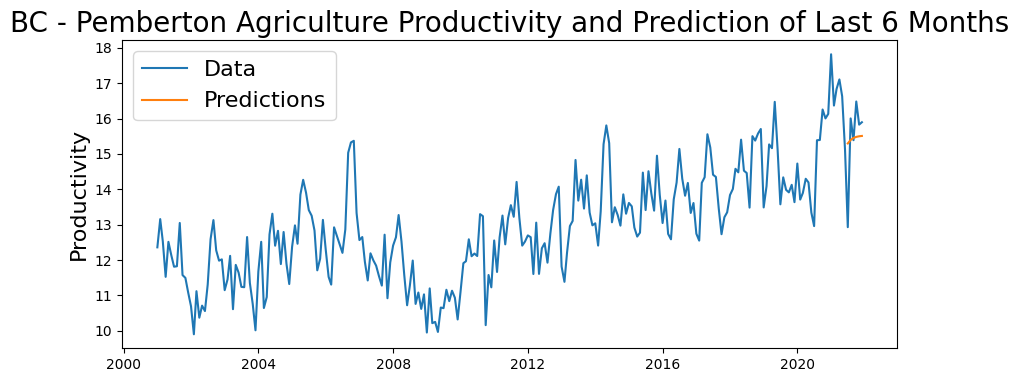

In [35]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Agriculture_Pemberton['Agriculture'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BC - Pemberton Agriculture Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [36]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 1.0984038636535445
Mean Absolute Error: 0.7926521516913413
Mean Squared Error: 1.2064910476890345


# SARIMA

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
7  1  3  643.166997  664.343571
6  1  2  648.223773  665.870918
5  1  1  650.417415  664.535132
4  1  0  658.271448  668.859735
3  0  3  707.283164  724.930310
2  0  2  734.540271  748.657988
1  0  1  797.423451  808.011738
0  0  0  946.230935  953.289793
   p  q         AIC         BIC
7  1  3  643.166997  664.343571
5  1  1  650.417415  664.535132
6  1  2  648.223773  665.870918
4  1  0  658.271448  668.859735
3  0  3  707.283164  724.930310
2  0  2  734.540271  748.657988
1  0  1  797.423451  808.011738
0  0  0  946.230935  953.289793


In [38]:
model_SARIMA=SARIMAX(Agriculture_Pemberton['Agriculture'],order=(0,1,0),seasonal_order=(1,0,3,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                Agriculture   No. Observations:                  252
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -332.520
Date:                                    Mon, 08 Apr 2024   AIC                            675.039
Time:                                            00:53:02   BIC                            692.666
Sample:                                        01-01-2001   HQIC                           682.133
                                             - 12-01-2021                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5951      0.659     -0.903      0.367      -1.887       0.697
ma.S.L12       0.7338      0.655      1.120      0.263      -0.550       2.017
ma.S.L24       0.0552      0.117      0.470      0.638      -0.175       0.285
ma.S.L36      -0.0671      0.078     -0.866      0.387      -0.219       0.085
sigma2         0.8268      0.070     11.823      0.000       0.690       0.964
===================================================================================
Ljung-Box (L1) (Q):                  13.77   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.00   Prob(JB):                         0.57
Heteroskedasticity (H):               1.12   Skew:                            -0.05
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [39]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Agriculture_Pemberton[:train_dataset_end]
test_data=Agriculture_Pemberton[train_dataset_end+timedelta(days=1):test_dataset_end]


In [40]:
#Fit SARIMA model
my_order = (0,1,0)
my_seasonal_order = (1, 0, 3, 12)
# define model
model = SARIMAX(train_data['Agriculture'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                         SARIMAX Results                                          
Dep. Variable:                                Agriculture   No. Observations:                  246
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -318.824
Date:                                    Mon, 08 Apr 2024   AIC                            647.648
Time:                                            00:53:03   BIC                            665.155
Sample:                                        01-01-2001   HQIC                           654.698
                                             - 06-01-2021                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0906      3.341      0.027      0

Text(0, 0.5, 'Error')

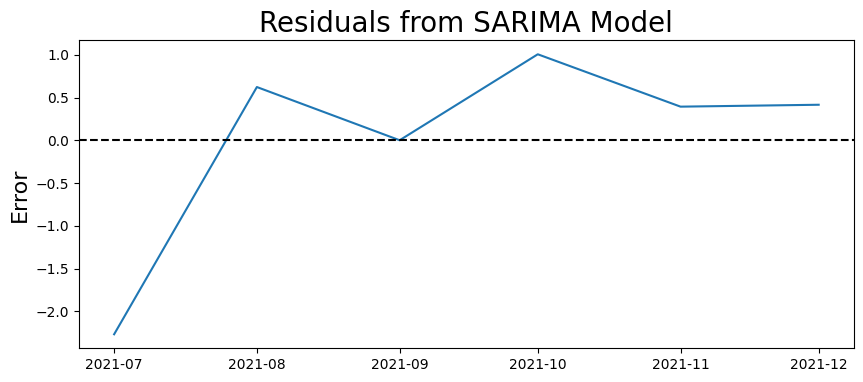

In [41]:
predictions = model_fit.forecast(steps=len(test_data['Agriculture']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Agriculture'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

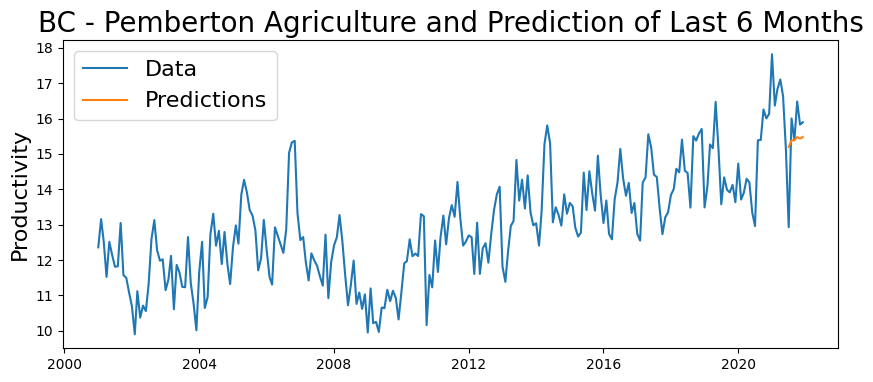

In [42]:
plt.figure(figsize=(10,4))

plt.plot(Agriculture_Pemberton['Agriculture'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('BC - Pemberton Agriculture and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [43]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 1.0700386971108713
Mean Absolute Error: 0.7845192896526255
Mean Squared Error: 1.144982813314731
